In [370]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf

In [371]:
df = pd.read_csv('crimedata.csv')
# check we have imported data succesfuly
df.columns

Index(['communityName', 'state', 'countyCode', 'communityCode', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=146)

In [372]:
# adjust community names
suffixes = ['township', 'city', 'borough']

for suffix in suffixes:
    df['communityName'] = df['communityName'].str.replace(suffix, '')

In [373]:
# show strongest correlations in regards to ViolentCrimesPerPop
print(df.corr().sort_values('ViolentCrimesPerPop', ascending=False).index)

Index(['ViolentCrimesPerPop', 'assaultPerPop', 'robbbPerPop',
       'PctKidsBornNeverMar', 'burglPerPop', 'nonViolPerPop', 'murdPerPop',
       'autoTheftPerPop', 'racepctblack', 'rapesPerPop',
       ...
       'medFamInc', 'PctHousOwnOcc', 'RacialMatchCommPol', 'PctPersOwnOccup',
       'pctWInvInc', 'PctTeen2Par', 'PctYoungKids2Par', 'racePctWhite',
       'PctFam2Par', 'PctKids2Par'],
      dtype='object', length=144)


C:\Users\samla\AppData\Local\Temp\ipykernel_14660\2749285559.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr().sort_values('ViolentCrimesPerPop', ascending=False).index)


<AxesSubplot: >

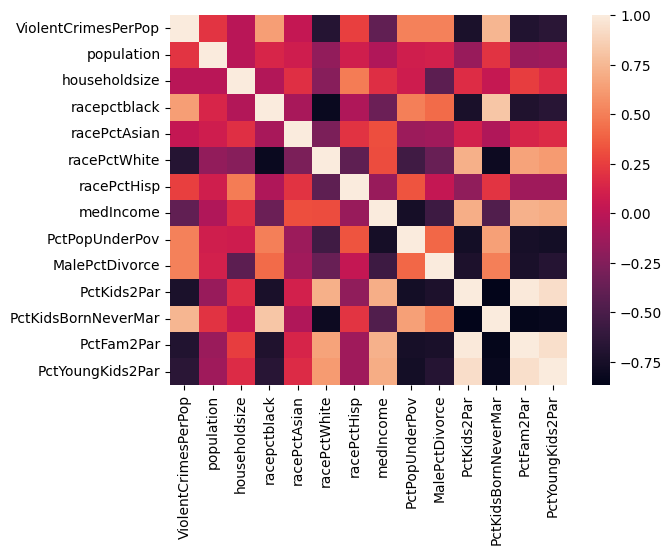

In [374]:
# plot relevant features and their correlation
sb.heatmap(df[["ViolentCrimesPerPop", "population", "householdsize", "racepctblack", "racePctAsian", "racePctWhite", "racePctHisp", "medIncome", "PctPopUnderPov", "MalePctDivorce", "PctKids2Par", "PctKidsBornNeverMar", "PctFam2Par", "PctYoungKids2Par"]].corr())

In [375]:
# features with strong correlation on which we will focus
feature_names = ["PctKids2Par", "PctKidsBornNeverMar", "PctFam2Par"]
# dropping non-existing values results in better performance than replacing nulls with the column median
updated_df = df.dropna(subset=['ViolentCrimesPerPop'])

X = updated_df[feature_names]
y = updated_df.ViolentCrimesPerPop

In [376]:
print(X.describe())
print(y.count())

       PctKids2Par  PctKidsBornNeverMar   PctFam2Par
count  1994.000000          1994.000000  1994.000000
mean     70.905045             3.139739    73.900848
std      11.845832             3.074032    10.301559
min      26.110000             0.000000    32.240000
25%      63.622500             1.082500    67.672500
50%      72.065000             2.080000    74.770000
75%      79.817500             3.980000    81.645000
max      92.580000            24.190000    93.600000
1994


In [377]:
history = []

In [378]:
#split data into training and validation
from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [379]:
# Define model
crime_model = DecisionTreeRegressor(random_state = 1)
# Fit model
history.append(('decision_tree', crime_model.fit(
    train_X, train_y
)))

In [380]:
from sklearn.ensemble import RandomForestRegressor

forest_crime_model = RandomForestRegressor(random_state=1)

history.append(('random_forest', forest_crime_model.fit(
    train_X, train_y
)))

In [381]:
from sklearn.ensemble import RandomForestRegressor

forest_crime_model_1 = RandomForestRegressor(random_state=1, max_depth=3, min_samples_split=50, min_samples_leaf=9)

history.append(('random_forest_optimized', forest_crime_model_1.fit(
    train_X, train_y
)))

In [382]:
from sklearn.linear_model  import LinearRegression

# Define model
lin_crime_model = LinearRegression()
# Fit model
history.append(('linear_regression', lin_crime_model.fit(
    train_X, train_y
)))

In [383]:
from sklearn import svm

regr = svm.SVR()
history.append(('SVR', regr.fit(
    train_X, train_y
)))

In [384]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, random_state=1)
history.append(('lasso', lasso.fit(
    train_X, train_y
)))

In [385]:
# evaluate existing models
for model in range(len(history)):
    model_name = history[model][0]
    predictions = history[model][1].predict(val_X)
    mse = mean_squared_error(val_y, predictions)
    mae = mean_absolute_error(val_y, predictions)
    training_score = history[model][1].score(train_X, train_y)
    validation_score = history[model][1].score(val_X, val_y)
    print(model_name, ',mae: ', mae, ',mse: ', mse, ', training r2 score: ', training_score, ',validation r2 score: ',validation_score)

decision_tree ,mae:  339.5372945891783 ,mse:  314638.12978617236 , training r2 score:  1.0 ,validation r2 score:  0.0792870859540451
random_forest ,mae:  266.1000589178357 ,mse:  159698.79176133545 , training r2 score:  0.9324704357390594 ,validation r2 score:  0.532679843882484
random_forest_optimized ,mae:  264.82356752073866 ,mse:  147835.30996194598 , training r2 score:  0.6045937448770331 ,validation r2 score:  0.5673954738847033
linear_regression ,mae:  262.6226641959433 ,mse:  141262.80652422173 , training r2 score:  0.584790198798347 ,validation r2 score:  0.5866283265489265
SVR ,mae:  352.6858500693388 ,mse:  316072.54137006984 , training r2 score:  0.06475077795009787 ,validation r2 score:  0.07508962498436211
lasso ,mae:  262.6234548595262 ,mse:  141263.27977010564 , training r2 score:  0.5847901984643729 ,validation r2 score:  0.5866269417085159


In [357]:
# Set random seed
tf.random.set_seed(1)

dnn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
dnn_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mse'])

# Fit the model and save the history (we can plot this)
dnn_history =dnn_model.fit(
    train_X, train_y, epochs=100, verbose=0
)
dnn_model.evaluate(val_X, val_y)

16/16 [==============================] - 0s 2ms/step - loss: 263.6349 - mse: 164073.4375


[263.6349182128906, 164073.4375]

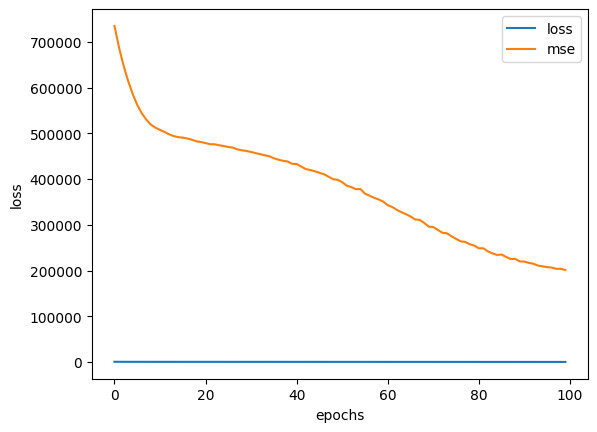

In [358]:
pd.DataFrame(dnn_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");


In [361]:
dnn_optimized_model = tf.keras.Sequential([
  tf.keras.layers.Dense(40), 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
dnn_optimized_model.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(), 
                          metrics=['mse'])

# Fit the model and save the history (we can plot this)
dnn_optimized_history =dnn_optimized_model.fit(
    train_X, train_y, epochs=400, verbose=0
)
dnn_optimized_model.evaluate(val_X, val_y)

16/16 [==============================] - 0s 2ms/step - loss: 142205.7812 - mse: 142205.7812


[142205.78125, 142205.78125]

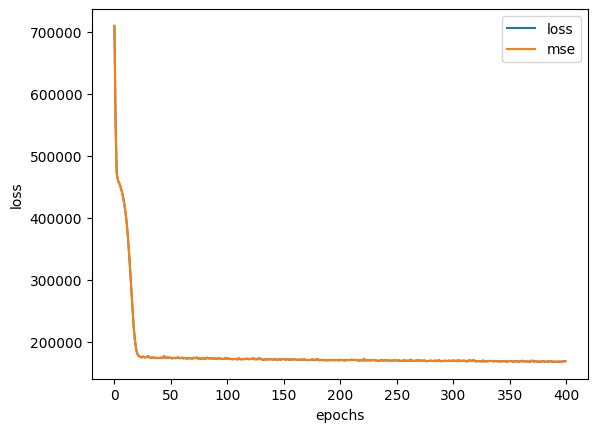

In [363]:
pd.DataFrame(dnn_optimized_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");